In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Đọc file CSV
# parse_dates: Tự động hiểu cột Datetime là thời gian
df = pd.read_csv('C:\\Users\\minam\\OneDrive\\Máy tính\\TTCN2\\TTCN2\\data\\data_change_realtime.csv', parse_dates=['Datetime'])

# 2. Đặt Datetime làm Index (Rất quan trọng cho Time-series)
df.set_index('Datetime', inplace=True)

# 3. Sắp xếp lại thời gian (đề phòng gói tin Socket đến lộn xộn)
df.sort_index(inplace=True)

print("Dữ liệu thô ban đầu:")
print(df.head(5))
# Lúc này bạn sẽ thấy rất nhiều giá trị NaN (Not a Number)

Dữ liệu thô ban đầu:
                        Gold   Silver    Brent     Wheat  USD index
Datetime                                                           
2025-11-28 09:54:10  4189.25      NaN      NaN       NaN        NaN
2025-11-28 09:54:10  4189.25  54.0125      NaN       NaN        NaN
2025-11-28 09:54:10  4189.25  54.0125  62.8905       NaN        NaN
2025-11-28 09:54:10  4189.25  54.0125  62.8905  522.0042        NaN
2025-11-28 09:54:10  4189.25  54.0125  62.8905  522.0042    0.80531


In [49]:
# 1. Forward Fill: Lấp đầy ô trống bằng giá trị liền trước nó
df_clean = df.ffill()

# 2. Backward Fill (Tùy chọn):
# Xử lý các dòng đầu tiên nếu dòng 1 chưa có dữ liệu ngay
# Lưu ý: Chỉ dùng bfill cho vài dòng đầu, lạm dụng sẽ gây Data Leakage (lộ đề)
df_clean = df_clean.bfill()

print("Dữ liệu sau khi lấp đầy:")
print(df_clean.head(5))

Dữ liệu sau khi lấp đầy:
                        Gold   Silver    Brent     Wheat  USD index
Datetime                                                           
2025-11-28 09:54:10  4189.25  54.0125  62.8905  522.0042    0.80531
2025-11-28 09:54:10  4189.25  54.0125  62.8905  522.0042    0.80531
2025-11-28 09:54:10  4189.25  54.0125  62.8905  522.0042    0.80531
2025-11-28 09:54:10  4189.25  54.0125  62.8905  522.0042    0.80531
2025-11-28 09:54:10  4189.25  54.0125  62.8905  522.0042    0.80531


In [52]:
# Resample về khung thời gian 1 phút (1min) hoặc 5 phút (5min)
# .last(): Lấy giá trị cuối cùng trong phút đó (Close Price)
df_resampled = df_clean.resample('5min').last()

# Sau khi resample, có thể lại sinh ra NaN (phút đó không có giao dịch)
# Ta lại ffill một lần nữa cho chắc
df_resampled = df_resampled.ffill()

# Xóa các dòng NaN còn sót lại (nếu có)
df_resampled.dropna(inplace=True)

print(f"Kích thước dữ liệu chuẩn để train: {df_resampled.shape}")

Kích thước dữ liệu chuẩn để train: (2, 5)


✅ Đã lưu biểu đồ vào plots/cleaned_resampled.png


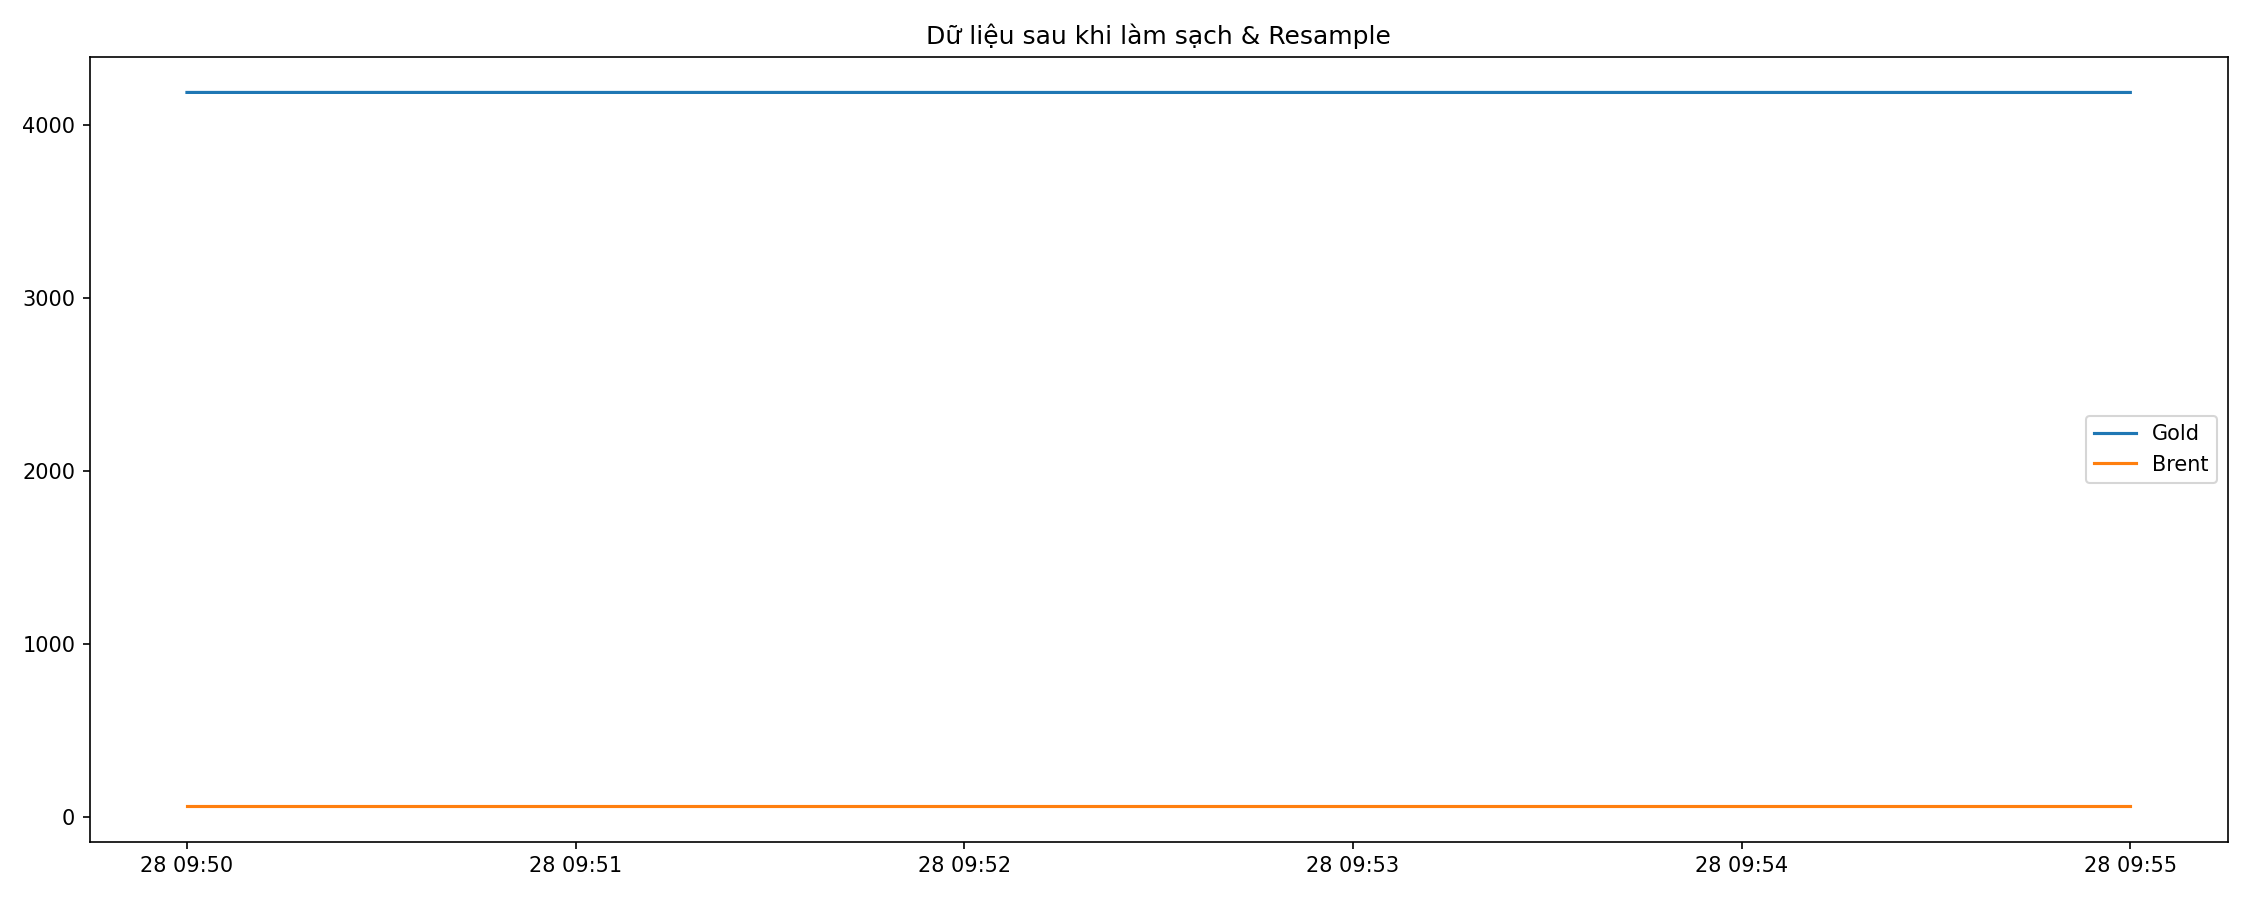

✅ Đã xuất file training_data_final.csv thành công!


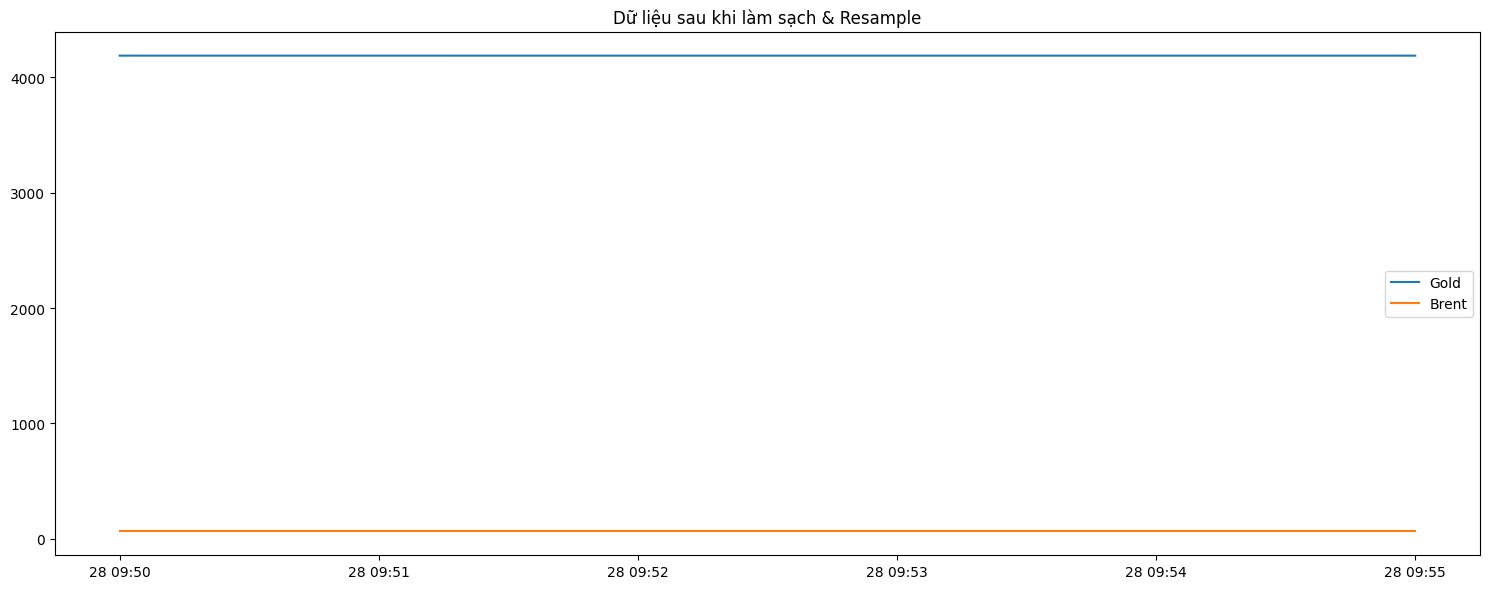

In [53]:
# Vẽ biểu đồ kiểm tra
plt.figure(figsize=(15, 6))
# Nếu dữ liệu quá lớn, downsample để tránh vẽ chậm/treo
plot_df = df_resampled.copy()
if len(plot_df) > 10000:
    plot_df = plot_df.iloc[-10000:]
plt.plot(plot_df['Gold'], label='Gold')
plt.plot(plot_df['Brent'], label='Brent')
plt.legend()
plt.title('Dữ liệu sau khi làm sạch & Resample')
plt.tight_layout()
import os
os.makedirs('plots', exist_ok=True)
out_path = 'plots/cleaned_resampled.png'
plt.savefig(out_path, dpi=150)
print(f"✅ Đã lưu biểu đồ vào {out_path}")
# Hiển thị ảnh đã lưu inline (an toàn hơn so với plt.show() trong một số môi trường)
try:
    from IPython.display import Image, display
    display(Image(out_path))
except Exception:
    # Nếu không phải notebook hoặc display thất bại, dùng plt.show() như fallback
    plt.show()

# Xuất file cuối cùng để ném vào Model
df_resampled.to_csv('training_data_final.csv')
print("✅ Đã xuất file training_data_final.csv thành công!")